In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rent_df=pd.read_csv("data/Rent_Data.csv")
rent_df.columns = ["Year", "Quarter", "LGA", "Dwelling Type", "Bedroom Number", 
                "First QNB", "Second QNB", "Third QNB", "NB Lodged", "TB Lodged", "Qtrly Median Change", 
                "Annly Median Change", "Qtrly NB", "Annly NB"]
rent_df.head()

,Year,Quarter,LGA,Dwelling Type,Bedroom Number,First QNB,Second QNB,Third QNB,NB Lodged,TB Lodged,Qtrly Median Change,Annly Median Change,Qtrly NB,Annly NB
0,2019,2,Albury,Total,Total,220,275,340,623.00,6095.00,-5.17%,1.85%,-16.93%,-5.03%
1,2019,2,Albury,Total,Bedsitter,-,-,-,-,-,-,-,-,-
2,2019,2,Albury,Total,1 Bedroom,165,178,200,50.00,496.00,1.43%,4.41%,-12.28%,11.11%
3,2019,2,Albury,Total,Not Specified,-,-,-,-,214.00,-,-,-,-
4,2019,2,Albury,Total,2 Bedrooms,190,235,265,255.00,2341.00,0.00%,2.17%,-5.56%,0.00%


In [3]:
rent_df = rent_df.replace("-", np.nan)

In [4]:
rent_df["First QNB"] = rent_df["First QNB"].astype(str).astype(float)
rent_df["Second QNB"] = rent_df["Second QNB"].astype(str).astype(float)
rent_df["Third QNB"] = rent_df["Third QNB"].astype(str).astype(float)

In [5]:
### NAN values are replaced with min-1 ###

f_min_val = np.min(rent_df["First QNB"]) - 1
s_min_val = np.min(rent_df["Second QNB"]) - 1
t_min_val = np.min(rent_df["Third QNB"]) - 1

In [6]:
null = []
for x in rent_df.index:#range(len(rent_df.index)):
    null_row = rent_df.loc[x].isnull().sum()
    if null_row == 9:
        null.append(x)
        rent_df.loc[x] = rent_df.loc[x].replace(np.nan, 0)

In [7]:
### NAN values are replaced with min-1 ###

rent_df["First QNB"] = rent_df["First QNB"].replace(np.nan, f_min_val)
rent_df["Second QNB"] = rent_df["Second QNB"].replace(np.nan, s_min_val)
rent_df["Third QNB"] = rent_df["Third QNB"].replace(np.nan, t_min_val)

In [8]:
### replace s  with 1 ###
rent_df = rent_df.replace("s", 1)
rent_df["NB Lodged"] = rent_df["NB Lodged"].astype(str).astype(float)
rent_df["TB Lodged"] = rent_df["TB Lodged"].astype(str).astype(float)

In [9]:
### NAN values are replaced with 0 ###
### s values which mean really small values are replaced with min/2 ###

fq_min_val = np.min(rent_df["NB Lodged"])
rent_df["NB Lodged"] = rent_df["NB Lodged"].replace(1, fq_min_val)/2
rent_df["NB Lodged"] = rent_df["NB Lodged"].replace(np.nan, 0)

sq_min_val = np.min(rent_df["TB Lodged"])
rent_df["TB Lodged"] = rent_df["TB Lodged"].replace(1, sq_min_val)/2
rent_df["TB Lodged"] = rent_df["TB Lodged"].replace(np.nan, 0)

In [10]:
### float to int ###
rent_df["NB Lodged"] = rent_df["NB Lodged"].astype(int)
rent_df["TB Lodged"] = rent_df["TB Lodged"].astype(int)

rent_df["First QNB"] = rent_df["First QNB"].astype(int)
rent_df["Second QNB"] = rent_df["Second QNB"].astype(int)
rent_df["Third QNB"] = rent_df["Third QNB"].astype(int)

In [11]:
### remove % sign ###
rent_df['Qtrly Median Change'] = rent_df['Qtrly Median Change'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Annly Median Change'] = rent_df['Annly Median Change'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Qtrly NB'] = rent_df['Qtrly NB'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Annly NB'] = rent_df['Annly NB'].astype(str).str.extract('(\d+)').astype(float)

### replace nan values for the last 4 columns with 0 ###
rent_df = rent_df.replace(np.nan, 0)

In [12]:
rent_df

,Year,Quarter,LGA,Dwelling Type,Bedroom Number,First QNB,Second QNB,Third QNB,NB Lodged,TB Lodged,Qtrly Median Change,Annly Median Change,Qtrly NB,Annly NB
0,2019,2,Albury,Total,Total,220,275,340,311,3047,5.0,1.0,16.0,5.0
1,2019,2,Albury,Total,Bedsitter,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2019,2,Albury,Total,1 Bedroom,165,178,200,25,248,1.0,4.0,12.0,11.0
3,2019,2,Albury,Total,Not Specified,59,59,59,0,107,0.0,0.0,0.0,0.0
4,2019,2,Albury,Total,2 Bedrooms,190,235,265,127,1170,0.0,2.0,5.0,0.0
5,2019,2,Albury,Total,3 Bedrooms,280,310,348,113,1070,3.0,6.0,22.0,9.0
6,2019,2,Albury,Total,4 or more Bedrooms,360,400,430,41,446,0.0,2.0,29.0,16.0
7,2019,2,Albury,House,Total,275,320,370,156,1454,3.0,3.0,22.0,11.0
8,2019,2,Albury,House,Bedsitter,0,0,0,0,0,0.0,0.0,0.0,0.0
9,2019,2,Albury,House,1 Bedroom,59,59,59,0,0,0.0,0.0,0.0,0.0


In [13]:
%run scripts/PearsonValue.py

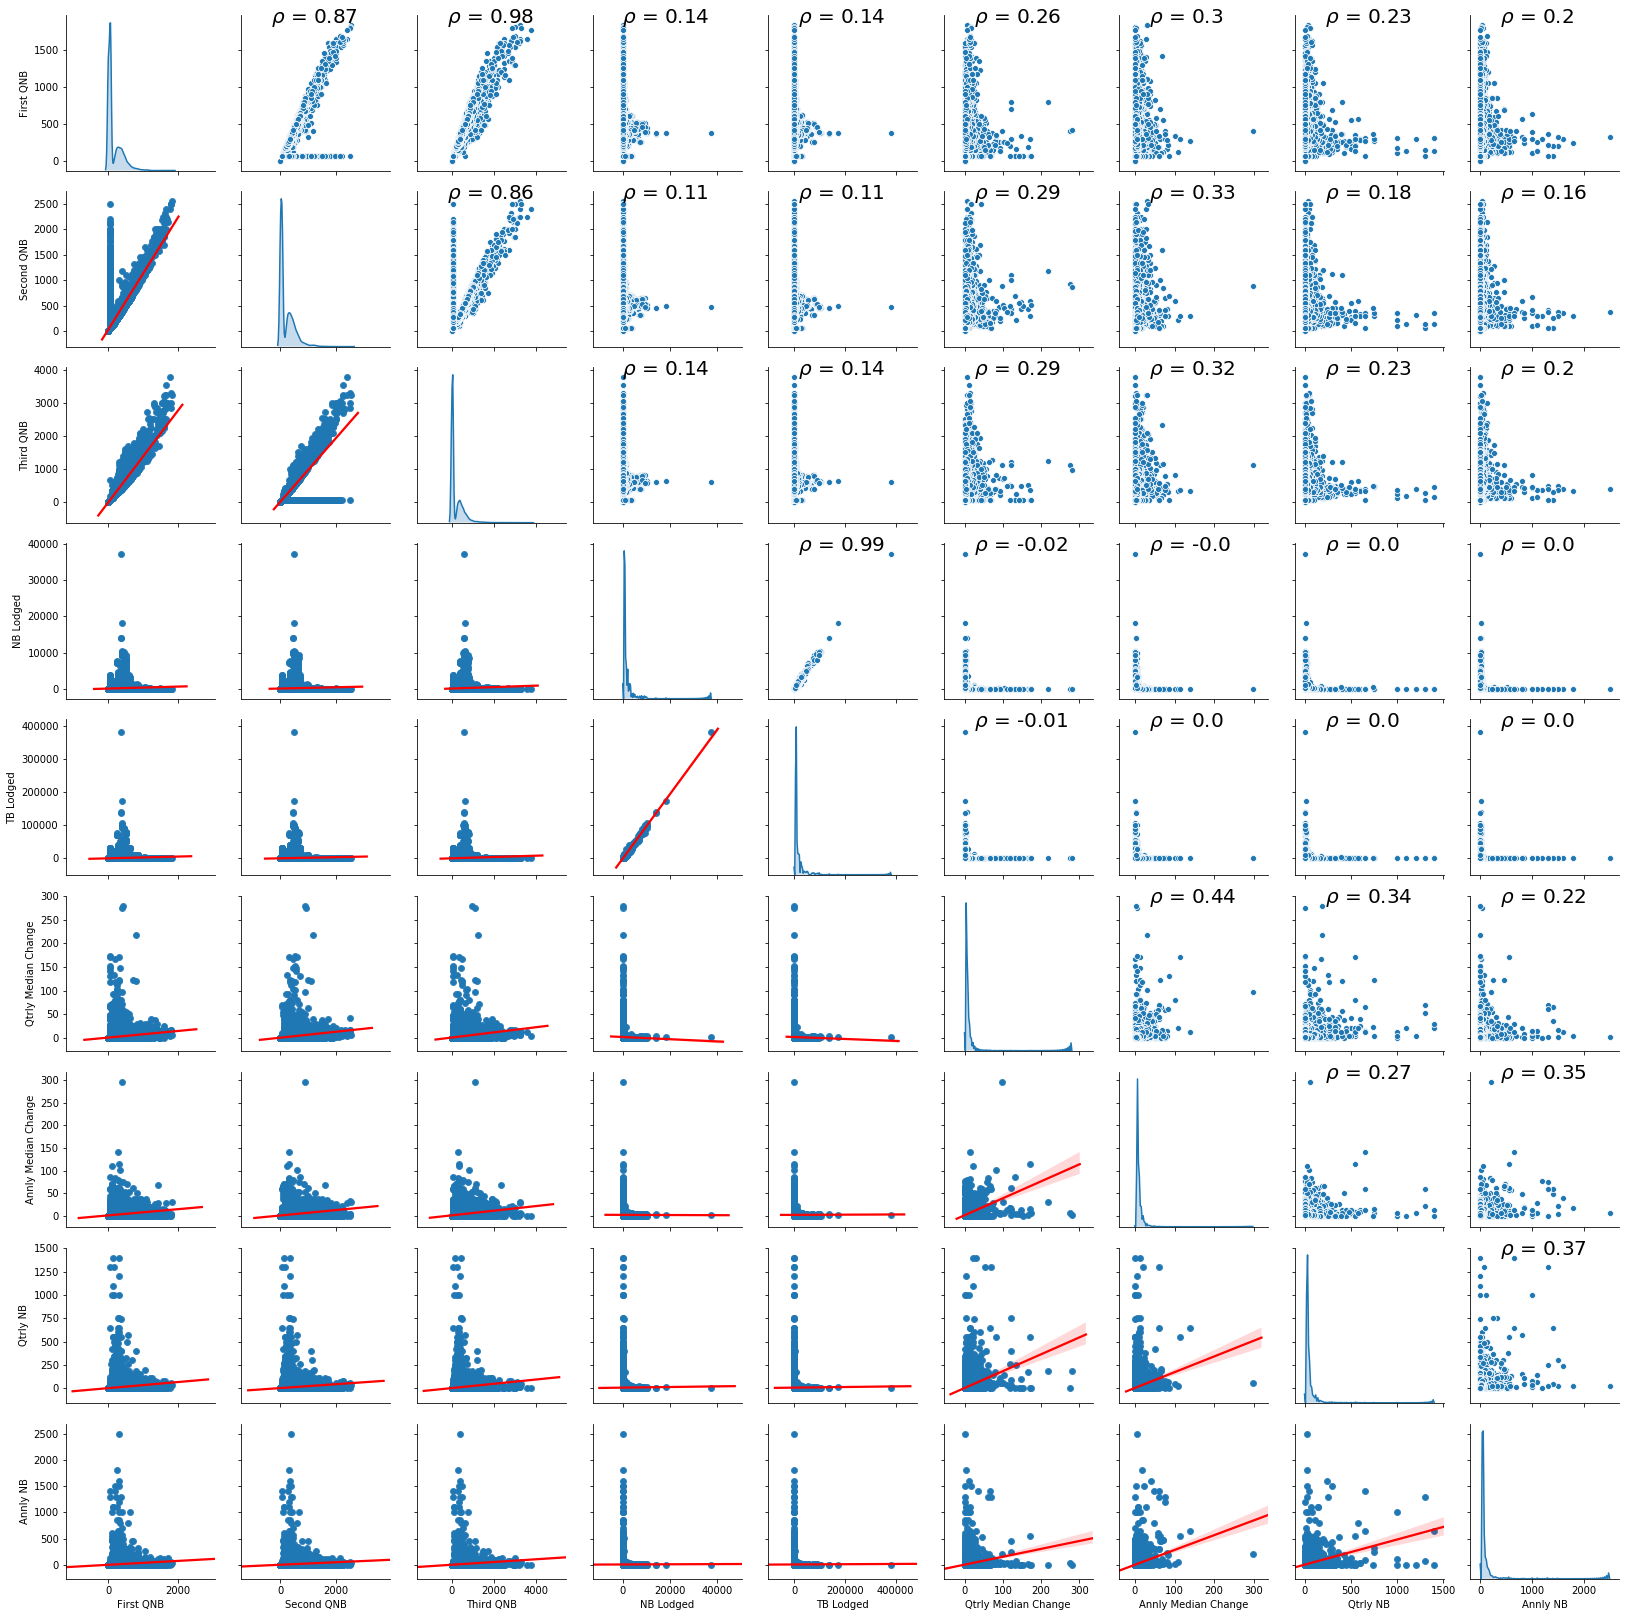

In [14]:
g = sns.pairplot(rent_df,
             vars = ["First QNB", "Second QNB", "Third QNB", "NB Lodged", "TB Lodged", "Qtrly Median Change", 
                     "Annly Median Change", "Qtrly NB", "Annly NB"],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()